# Discriminant Analysis with categorical variables (DISQUAL)

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

In [2]:
# Chargement des données
import pandas as pd
DTrain = pd.read_excel("./data/CongressVotePipeline.xlsx",sheet_name="train",header=0)
display(DTrain.head())

,handicapped_infants,water_project_cost_sharin,adoption_of_the_budget_re,physician_fee_freeze,el_salvador_aid,religious_groups_in_schoo,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutb,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act,group
0,n,y,y,y,y,y,y,n,y,y,n,y,y,y,n,y,republican
1,n,y,y,n,y,y,n,n,n,n,y,n,n,n,y,other,democrat
2,n,n,y,n,n,n,y,y,y,n,n,n,n,n,y,other,democrat
3,n,y,n,y,other,y,n,n,n,y,n,y,y,y,n,n,republican
4,y,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y,democrat


In [3]:
DTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   handicapped_infants        235 non-null    object
 1   water_project_cost_sharin  235 non-null    object
 2   adoption_of_the_budget_re  235 non-null    object
 3   physician_fee_freeze       235 non-null    object
 4   el_salvador_aid            235 non-null    object
 5   religious_groups_in_schoo  235 non-null    object
 6   anti_satellite_test_ban    235 non-null    object
 7   aid_to_nicaraguan_contras  235 non-null    object
 8   mx_missile                 235 non-null    object
 9   immigration                235 non-null    object
 10  synfuels_corporation_cutb  235 non-null    object
 11  education_spending         235 non-null    object
 12  superfund_right_to_sue     235 non-null    object
 13  crime                      235 non-null    object
 14  duty_free_

In [4]:
from discrimintools import DISQUAL

In [5]:
disqual = DISQUAL(n_components=2,target=["group"],priors="prop",parallelize=False)
disqual.fit(DTrain)

DISQUAL(n_components=2, priors='prop', target=['group'])

## Chi2 - statistics

In [6]:
disqual.statistics_["chi2"]

,statistic,ddl,pvalue
physician_fee_freeze,199.112779,2,5.797082e-44
adoption_of_the_budget_re,128.420017,2,1.300013e-28
el_salvador_aid,124.376638,2,9.816490e-28
education_spending,123.342020,2,1.646723e-27
aid_to_nicaraguan_contras,105.734648,2,1.096511e-23
crime,97.651124,2,6.242059e-22
mx_missile,94.959085,2,2.398263e-21
superfund_right_to_sue,83.325057,2,8.057379e-19
anti_satellite_test_ban,81.303433,2,2.214032e-18
duty_free_exports,69.756825,2,7.120295e-16


## Résultats de l'ACM

In [7]:
mca = disqual.factor_model_

### Valeurs propres

In [8]:
mca.eig_.head(6)

,eigenvalue,difference,proportion,cumulative
Dim.1,0.491167,0.201824,24.558363,24.558363
Dim.2,0.289343,0.192583,14.467157,39.025520
Dim.3,0.096760,0.002309,4.838004,43.863524
Dim.4,0.094451,0.009454,4.722554,48.586078
Dim.5,0.084997,0.006480,4.249873,52.835951
Dim.6,0.078517,0.014241,3.925868,56.761819


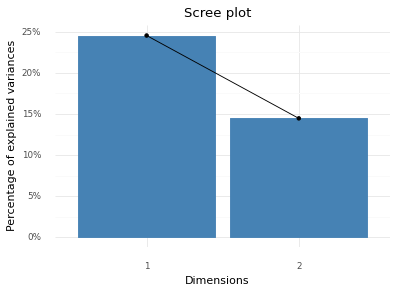

In [9]:
from scientisttools import fviz_screeplot
p = fviz_screeplot(mca)
print(p) 

In [10]:
# Fonction de projection
fproj = disqual.projection_function_
display(fproj.iloc[:,:2].head(6))

,Dim.1,Dim.2
handicapped_infants_n,0.045761,-0.001441
handicapped_infants_other,-0.016400,0.238952
handicapped_infants_y,-0.051921,-0.016531
water_project_cost_sharin_n,-0.010582,-0.023524
water_project_cost_sharin_other,-0.000626,0.120936
water_project_cost_sharin_y,0.010436,-0.006805


In [11]:
# Coeffcients du lDA
lda_coef = disqual.lda_model_.coef_
display(lda_coef)

,democrat,republican
Z1,-2.595147,4.933983
Z2,0.040781,-0.077534


In [12]:
lda_intercept = disqual.lda_model_.intercept_
display(lda_intercept)

,democrat,republican
Intercept,-0.96459,-3.024143


In [13]:
# Evaluation globale
se = disqual.lda_model_.statistics_["statistical_evaluation"].head(6)
display(se)

,Wilks L.,Partial L.,"F(1, 232)",p-value
Z1,0.999902,0.324869,482.133122,1.110223e-16
Z2,0.324936,0.999698,0.070136,7.913734e-01


In [14]:
coef = disqual.coef_
display(coef)

,democrat,republican
handicapped_infants_n,-0.118817,0.225898
handicapped_infants_other,0.052305,-0.099444
handicapped_infants_y,0.134068,-0.254895
water_project_cost_sharin_n,0.026502,-0.050387
water_project_cost_sharin_other,0.006557,-0.012466
water_project_cost_sharin_y,-0.027361,0.052019
adoption_of_the_budget_re_n,-0.234006,0.444900
adoption_of_the_budget_re_other,-0.038024,0.072292
adoption_of_the_budget_re_y,0.157373,-0.299203
physician_fee_freeze_n,0.160288,-0.304744


In [15]:
intercept = disqual.intercept_
display(intercept)

,democrat,republican
Intercept,-0.96459,-3.024143


In [16]:
DTest = pd.read_excel("./data/CongressVotePipeline.xlsx",sheet_name="test",header=0)
DTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   handicapped_infants        200 non-null    object
 1   water_project_cost_sharin  200 non-null    object
 2   adoption_of_the_budget_re  200 non-null    object
 3   physician_fee_freeze       200 non-null    object
 4   el_salvador_aid            200 non-null    object
 5   religious_groups_in_schoo  200 non-null    object
 6   anti_satellite_test_ban    200 non-null    object
 7   aid_to_nicaraguan_contras  200 non-null    object
 8   mx_missile                 200 non-null    object
 9   immigration                200 non-null    object
 10  synfuels_corporation_cutb  200 non-null    object
 11  education_spending         200 non-null    object
 12  superfund_right_to_sue     200 non-null    object
 13  crime                      200 non-null    object
 14  duty_free_

In [17]:
new_coord =  disqual.transform(DTest)
new_coord

,Z1,Z2
0,0.616492,-0.208293
1,0.588277,-0.202761
2,0.356280,0.901699
3,-0.187379,-0.167514
4,-0.766325,0.044437
...,...,...
195,0.347656,-0.197067
196,-0.654372,-0.222762
197,-0.569168,-0.184367
198,-0.383258,-0.101203


In [18]:
coord = disqual.transform(DTrain)
coord.iloc[:,:2]

,Z1,Z2
0,0.501172,-0.190110
1,-0.012276,-0.127623
2,-0.758888,-0.137300
3,0.985403,0.110462
4,-0.676041,-0.224226
...,...,...
230,0.858757,-0.144795
231,-0.354348,0.491681
232,-0.740076,0.143292
233,0.608310,-0.217004


In [19]:
pred_train = disqual.predict(DTrain)
pred_train

0      republican
1        democrat
2        democrat
3      republican
4        democrat
          ...    
230    republican
231      democrat
232      democrat
233    republican
234    republican
Name: prediction, Length: 235, dtype: object

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(DTrain[DTrain.columns[-1]],pred_train)

array([[137,  17],
       [  7,  74]], dtype=int64)

In [21]:
pred_test = disqual.predict(DTest)
pred_test

0      republican
1      republican
2      republican
3        democrat
4        democrat
          ...    
195    republican
196      democrat
197      democrat
198      democrat
199      democrat
Name: prediction, Length: 200, dtype: object

In [22]:
disqual.predict(DTest.drop(columns=["group"]))

0      republican
1      republican
2      republican
3        democrat
4        democrat
          ...    
195    republican
196      democrat
197      democrat
198      democrat
199      democrat
Name: prediction, Length: 200, dtype: object

In [23]:
disqual.pred_table()

prediction,democrat,republican
group,,
democrat,137,17
republican,7,74


In [24]:
confusion_matrix(DTest[DTest.columns[-1]],pred_test)

array([[97, 16],
       [15, 72]], dtype=int64)

In [25]:
prob_train = disqual.predict_proba(DTrain)
prob_train

,democrat,republican
0,0.149780,0.850220
1,0.894437,0.105563
2,0.999572,0.000428
3,0.004742,0.995258
4,0.999194,0.000806
...,...,...
230,0.011853,0.988147
231,0.991720,0.008280
232,0.999524,0.000476
233,0.072685,0.927315


In [26]:
prob_test = disqual.predict_proba(DTest)
prob_test

,democrat,republican
0,0.068706,0.931294
1,0.083658,0.916342
2,0.373732,0.626268
3,0.969247,0.030753
4,0.999604,0.000396
...,...,...
195,0.358632,0.641368
196,0.999052,0.000948
197,0.998209,0.001791
198,0.992848,0.007152
